<a href="https://colab.research.google.com/github/felps2003/Modelos-de-ML/blob/main/Previsao_sobreviventes_Titanic_ArvoresDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minha primeira arvore de decisão.

Vou utilizar a bibliotrca scikit-learn, com dados do Titanic tirado do Kaggle.

Meu objetivo é desenvolver um modelo para predizer sobreviventes e mortos do naufrágio.

**Esse notebook esta sendo feito para estudo, e aprimoramento da Tecninca de Machine Learning, com aprendizagem supervisionada.**



## **Importando as bibliotecas necessarias**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Essa é a biblioteca perfeita para manipular dados.
import pandas as pd

#Biblioteca de graficos
import matplotlib.pyplot as plt

#Metodo para separação de treino e teste
from sklearn.model_selection import train_test_split

#Algoritmos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Visualização da árvore
from sklearn.tree import plot_tree

#Meetrica de avaliação
from sklearn.metrics import accuracy_score

%matplotlib inline

## **Leitura da base de Treino, criação do dataframe**

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#Mostrar 5 linhas do dataframe
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Mostrar o valor da classe de cada id
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [5]:
#Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Descrição do dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Limpando a base de treino**

In [7]:
#Removendo linhas duplicadas, com dados duplicados
df.drop_duplicates(inplace=True)

In [8]:
#Removendo linhas com dados faltando
df.dropna(inplace=True)

In [9]:
#Vendo quantas linhas ainda sobraram
df.shape

(183, 12)

In [11]:
#Vendo os resultados quem tem na coluna Sex
df["Sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
def sexo(x):
  if x == "male":
    return 0
  else:
    return 1

In [13]:
#Aplicando a função (sexo) feita para transforma male em 0 e female em 1
df["Sex"] = df["Sex"].apply(sexo)

In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [15]:
#Separando as colunas necessarias para nosso modelo
df = df[ ["Survived", "Age", "Pclass", "Sex"]]

In [16]:
df.head(5)

,Survived,Age,Pclass,Sex
1,1,38.0,1,1
3,1,35.0,1,1
6,0,54.0,1,0
10,1,4.0,3,1
11,1,58.0,1,1


## **Criando os modelos de ML**

In [17]:
#Separando os dados da Label
X = df.drop(columns=["Survived"]) # Dados
y = df["Survived"]                # Label

In [18]:
X

,Age,Pclass,Sex
1,38.0,1,1
3,35.0,1,1
6,54.0,1,0
10,4.0,3,1
11,58.0,1,1
...,...,...,...
871,47.0,1,1
872,33.0,1,0
879,56.0,1,1
887,19.0,1,1


In [19]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [21]:
#Aqui estou fazendo a separação dos dados para teste e para a base de treino
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, #separando 25% dos dados para teste
                                                    random_state=5) #expecificando uma parte do df, colocando uma seed

In [25]:
#Vendo o tamanho da base de treino, ficou com 137 linhas
X_train.shape

(137, 3)

In [24]:
#Vendo o tamanho da base de teste, ficou com 46 linhas
X_test.shape

(46, 3)

Criando o modelo de arvore de decisão

In [26]:
#Criando a Arvore de decisão, normalmente teriamos que padronizar
#os dados primeiro, entretando esse df tem dados bem comportados

#Criando a Arvore e importando a classe DecisionTreeClassifier()
tree = DecisionTreeClassifier()

#Treinando o modelo com os dados e labels do TREINO
tree.fit(X_train, y_train)

#Utilizando do metodo predict() para obter os valores preditos do TESTE
Y_pred_label = tree.predict(X_test)

In [27]:
#Vendo quais são as classes
tree.classes_

array([0, 1])

In [28]:
#Vendo quais são as labels preditas
Y_pred_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
#Vendo qual é a taxa de acerto
accuracy_score(y_test, Y_pred_label)

0.8043478260869565

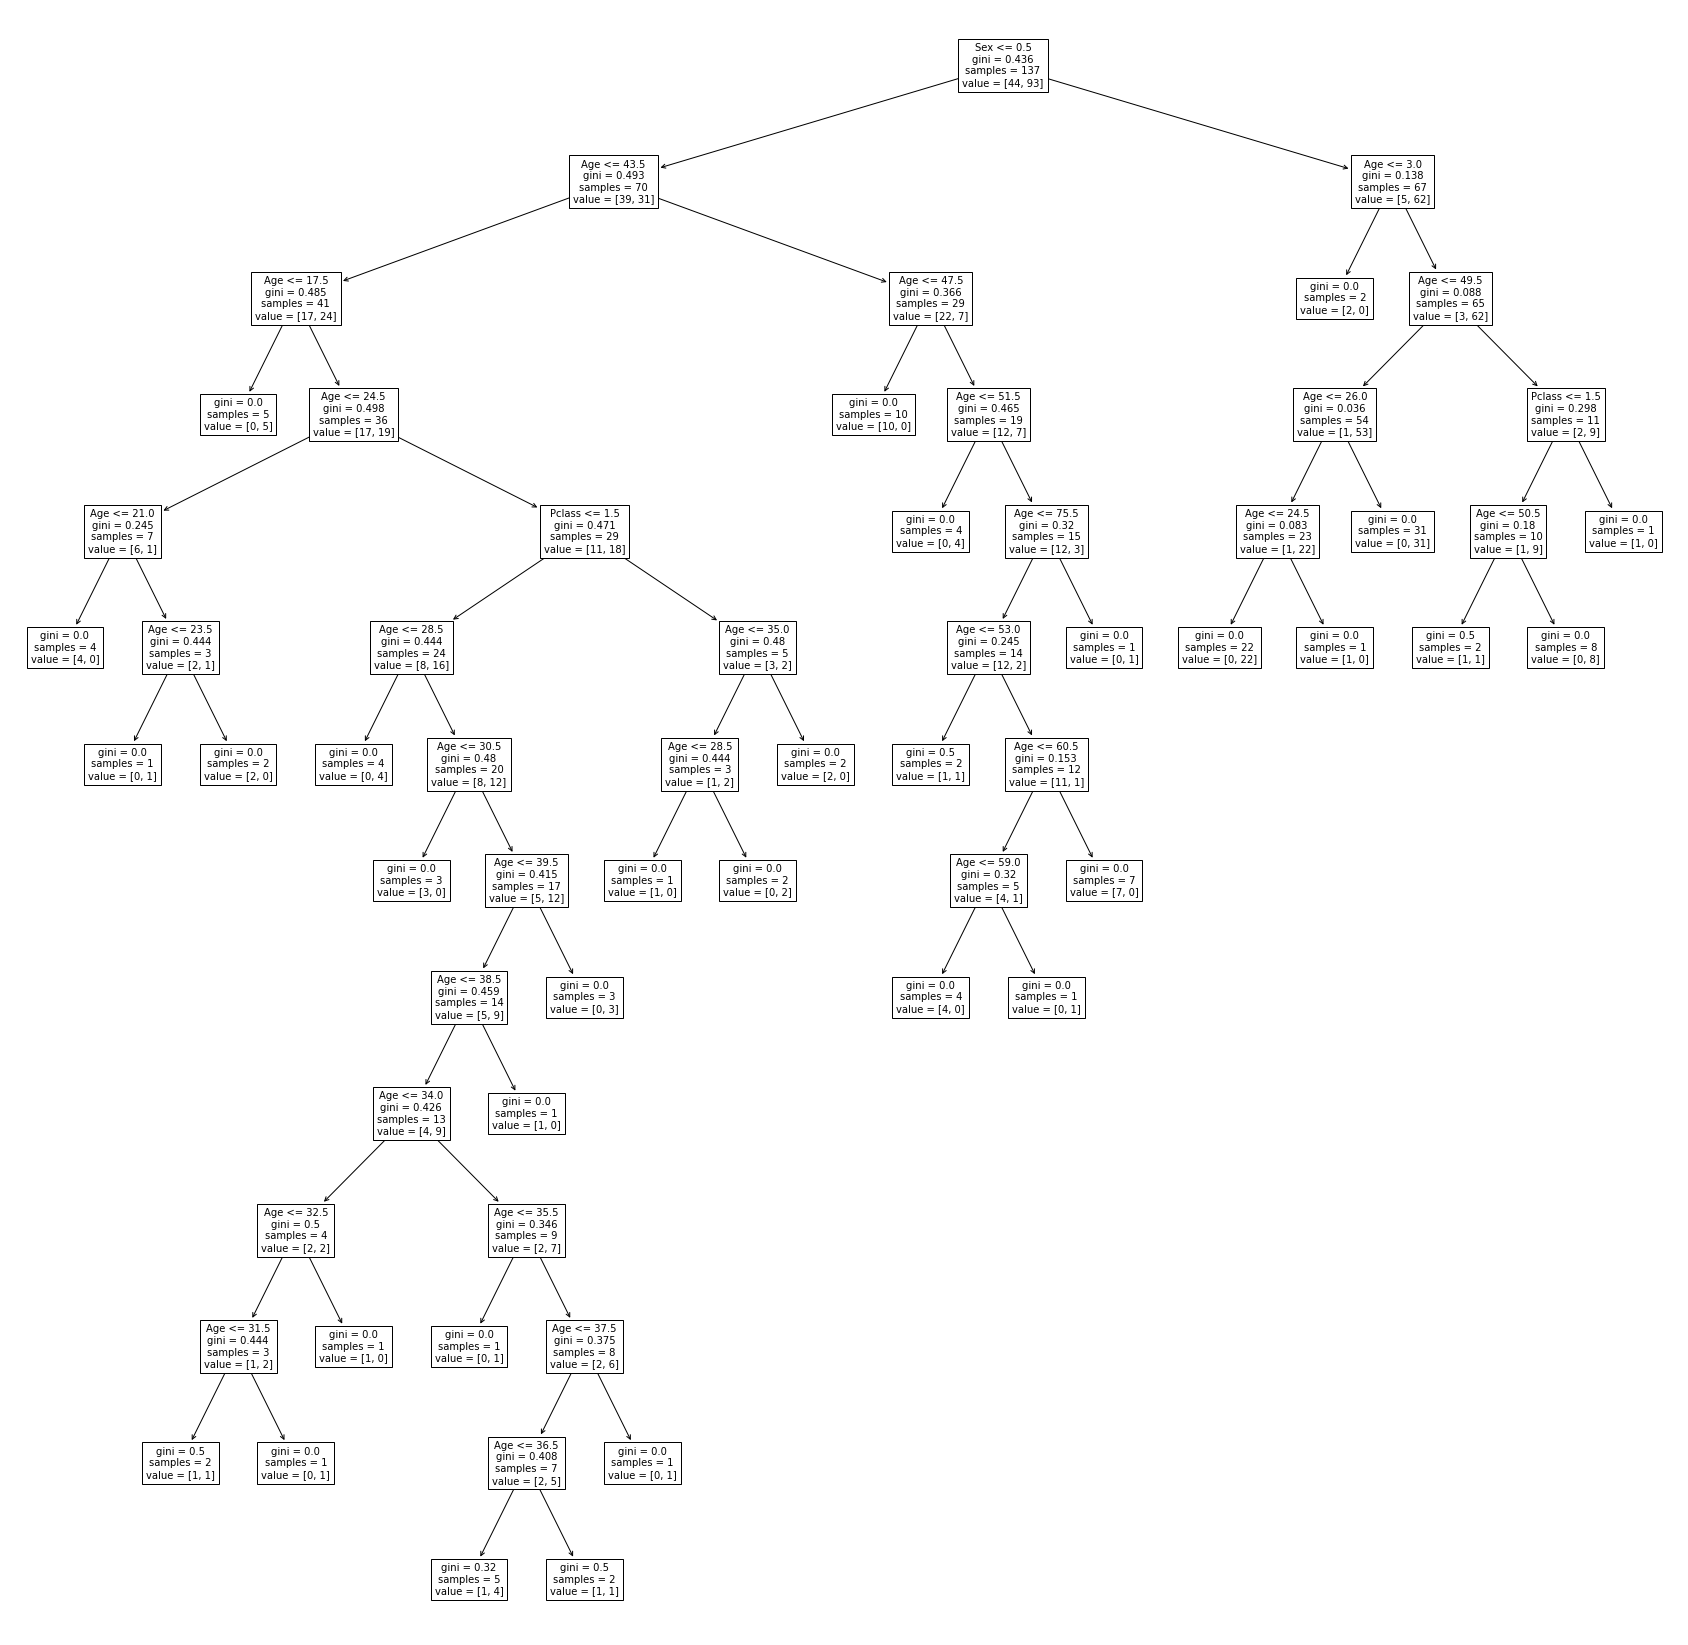

In [30]:
#Visualizando a árvore que foi criada

#Criando a figura, definindo o tamanho
plt.figure(figsize=(30, 30))

#criando a imagem da arvore
plot_tree(tree, fontsize=10, feature_names=X_train.columns)

#mostrando a figura criada
plt.show()

Criando o modelo de Floresta Aleatória

In [31]:
#Criando a Floresta e importando a classe RandomForestClassifier()
#colocando n_estimators=5 para definir quantas arvores tera a nossa floresta
#isso serve para evitar o overfitting
floresta = RandomForestClassifier(n_estimators=5)

#Colocando a floresta para treinar com os dados e labels de TREINO
floresta.fit(X_train, y_train)

#Utilizando do metodo predict() para obter os valores preditos do TESTE
Y_pred_label_floresta = floresta.predict(X_test)

In [32]:
#Vendo a taxa de acerto do modelo de floresta criado
accuracy_score(y_test, Y_pred_label_floresta)

0.7391304347826086

## **Trabalhando com a AUC**

In [33]:
#Criando a Arvore de decisão
tree = DecisionTreeClassifier()

#Fazendo o nosso modelo treinar com os dados e labels de TREINO
tree.fit(X_train, y_train)

#Utilizando do metodo predict_proba() esse metodo é utilizado para obter a
#probabilidade de cada exemplo de teste
Y_pred_prob = tree.predict_proba(X_test)

In [34]:
#Aqui estou vendo a probabilidade de cada teste, se a pessoa morreu ou não
Y_pred_prob

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [36]:
#Importando o metodo que faz a avaliação do AUC
from sklearn.metrics import roc_auc_score

In [37]:
#Aqui estou realizando a avaliação para vermos a taxa de otimização do modelo
#utilizei [:,1] para o teste pegar apenas a parte de porcentagem de vida
roc_auc_score(y_test, Y_pred_prob[:,1])

0.7614583333333333

## **Criando multiplos modelos**
Para achamos o que tem melhor desempenho.

In [38]:
#Criando lista de tuplas , que contem o construtor de modelo de classificação
#e o seu nome como Str

modelos = [
    ( DecisionTreeClassifier(), "1 árvore" ),
    ( RandomForestClassifier(n_estimators=5), "5 árvores" ),
    ( RandomForestClassifier(n_estimators=10), "10 árvores" ),
    ( RandomForestClassifier(n_estimators=50), "50 árvores" ),
    ( RandomForestClassifier(n_estimators=100), "100 árvores" ),
]

In [40]:
#Utilizando do laço for, para armazenarmos o primeiro elemento na váriavel clas-
#sificador, e o segundo elemento na váriavel nome.
for classificador, nome in modelos:

  #para cada classificador, irei os treinar com o fit()
  classificador.fit(X_train, y_train)

  #obtendo as predições com predict()
  probs = classificador.predict_proba(X_test)

  #calculando o auc
  auc = roc_auc_score(y_test, probs[:,1])

  print(f"Modelo: {nome} | AUC: {auc}")

Modelo: 1 árvore | AUC: 0.7614583333333333
Modelo: 5 árvores | AUC: 0.684375
Modelo: 10 árvores | AUC: 0.690625
Modelo: 50 árvores | AUC: 0.7895833333333333
Modelo: 100 árvores | AUC: 0.7427083333333333


## **Conclusão**

#### O melhor modelo, foi o que utilizei a classificação com floresta aleatoria,  o modelo com 50 Árvores foi o melhor, ele poderia indicar melhor quem morreria ou não.